Hierarchical clustering algorithms group similar objects into groups called clusters. There are two types of hierarchical clustering algorithms:
Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.
Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

![alt text](https://miro.medium.com/max/627/0*E-qictlO_9isi0Dl.png)

Reference = 

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019

https://code-examples.net/en/q/2d8411

# Single

In [0]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [0]:
x = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
print(x)

[[1 2]
 [1 4]
 [1 0]
 [4 2]
 [4 4]
 [4 0]]


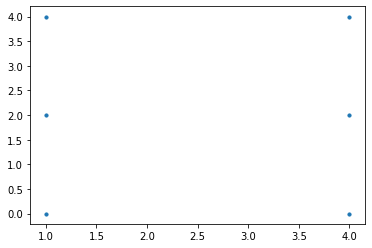

In [0]:
plt.scatter(x[:,0],x[:,1], s=10)

In [0]:
linkage_matrix = linkage(x, "single")

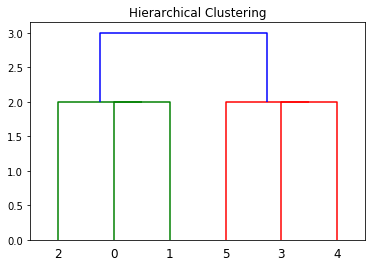

In [0]:
dendogram = dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering")
plt.show()

# Agglomerative

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [0]:
X = np.array([[5,3],[10,15],[15,12],[24,10],[30,30],
    [85,70],[71,80],[60,78],[70,55],[80,91],])
X

array([[ 5,  3],
       [10, 15],
       [15, 12],
       [24, 10],
       [30, 30],
       [85, 70],
       [71, 80],
       [60, 78],
       [70, 55],
       [80, 91]])

In [0]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [0]:
print(cluster.labels_)

[1 1 1 1 1 0 0 0 0 0]


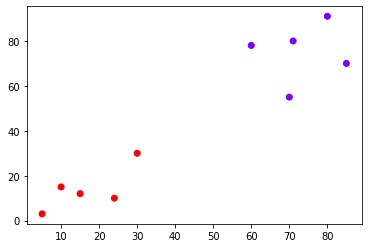

In [0]:
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

# Divisive

In [0]:
import scipy
import pylab
import scipy.cluster.hierarchy as sch

In [0]:
# Generate random features and distance matrix.
x = scipy.rand(40)
D = scipy.zeros([40,40])
for i in range(40):
    for j in range(40):
        D[i,j] = abs(x[i] - x[j])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.rand is deprecated and will be removed in SciPy 2.0.0, use numpy.random.rand instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  


[]

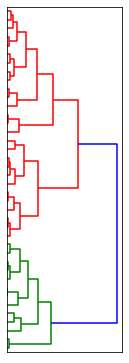

In [0]:
# Compute and plot first dendrogram.
fig = pylab.figure(figsize=(8,8))
ax1 = fig.add_axes([0.09,0.1,0.2,0.6])
Y = sch.linkage(D, method='centroid')
Z1 = sch.dendrogram(Y, orientation='right')
ax1.set_xticks([])
ax1.set_yticks([])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


[]

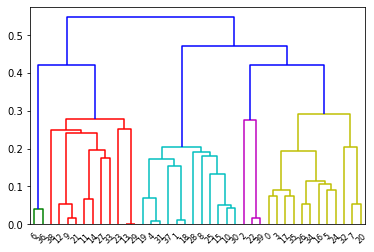

In [0]:
# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Y = sch.linkage(D, method='single')
Z2 = sch.dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

In [0]:
# Plot distance matrix.
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=pylab.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


[]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.rand is deprecated and will be removed in SciPy 2.0.0, use numpy.random.rand instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


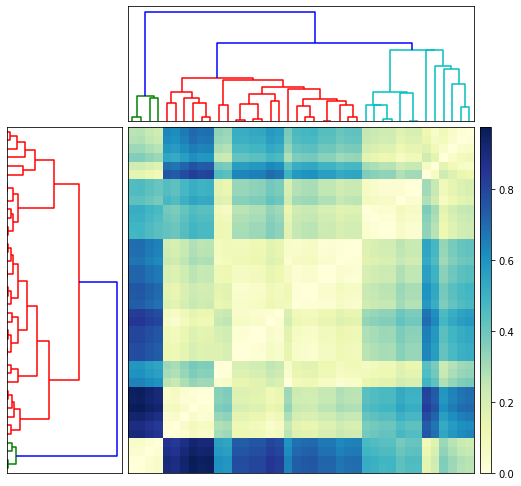

In [0]:
# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
pylab.colorbar(im, cax=axcolor)
fig.show()
fig.savefig('dendrogram.png')